<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-качества-моделей" data-toc-modified-id="Проверка-качества-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка качества моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Расчет-порогового-значения-запасов" data-toc-modified-id="Расчет-порогового-значения-запасов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет порогового значения запасов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Функция-для-расчета-прибыли-на-скважину" data-toc-modified-id="Функция-для-расчета-прибыли-на-скважину-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Функция для расчета прибыли на скважину</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Bootstrap:-регион-0" data-toc-modified-id="Bootstrap:-регион-0-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bootstrap: регион 0</a></span></li><li><span><a href="#Bootstrap:-регион-1" data-toc-modified-id="Bootstrap:-регион-1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bootstrap: регион 1</a></span></li><li><span><a href="#Bootstrap:-регион-2" data-toc-modified-id="Bootstrap:-регион-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bootstrap: регион 2</a></span></li><li><span><a href="#Bootstrap:-оформление-результатов" data-toc-modified-id="Bootstrap:-оформление-результатов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Bootstrap: оформление результатов</a></span></li><li><span><a href="#Bootstrap:-выводы" data-toc-modified-id="Bootstrap:-выводы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Bootstrap: выводы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import unittest
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [2]:
i = 0
dfs = []

for i in range(3):
    try:
        data = pd.read_csv("geo_data_{0}.csv".format(i))
    except:
        data = pd.read_csv("/datasets/geo_data_{0}.csv".format(i))
    finally:
        i += 1
        dfs.append(data)

df_geo_0 = dfs[0]
df_geo_1 = dfs[1]
df_geo_2 = dfs[2]

del(dfs)

In [3]:
display(df_geo_0.head())
display(df_geo_1.head())
display(df_geo_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные успешно загружены, можно их изучать и обрабатывать.

### Изучение данных

In [4]:
print(df_geo_0.info(), "\n")
print(df_geo_1.info(), "\n")
print(df_geo_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Colu

Пропусков нет, типы данных верные, посмотрим гистограммы

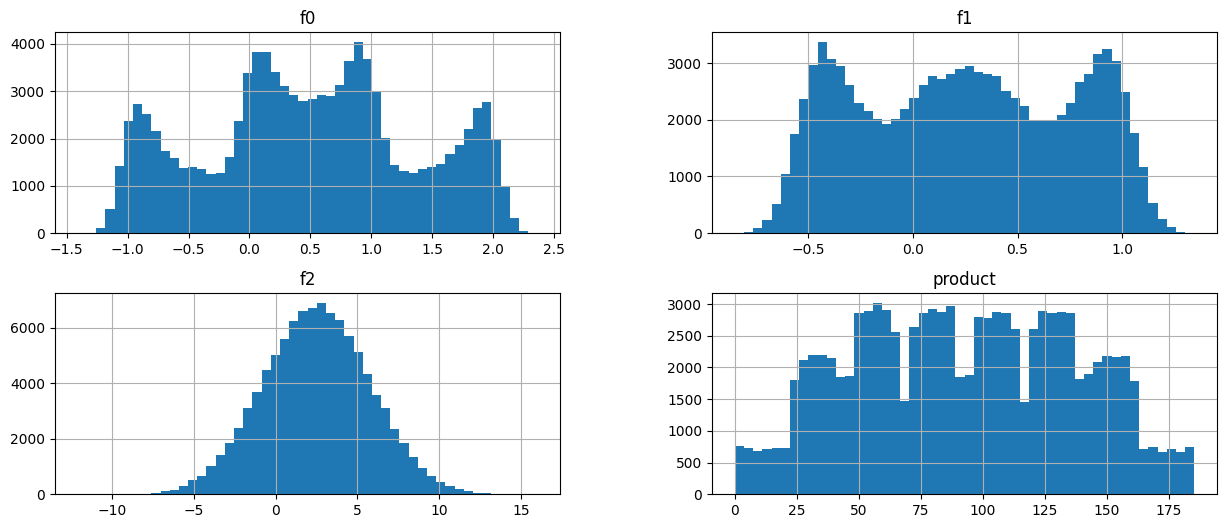

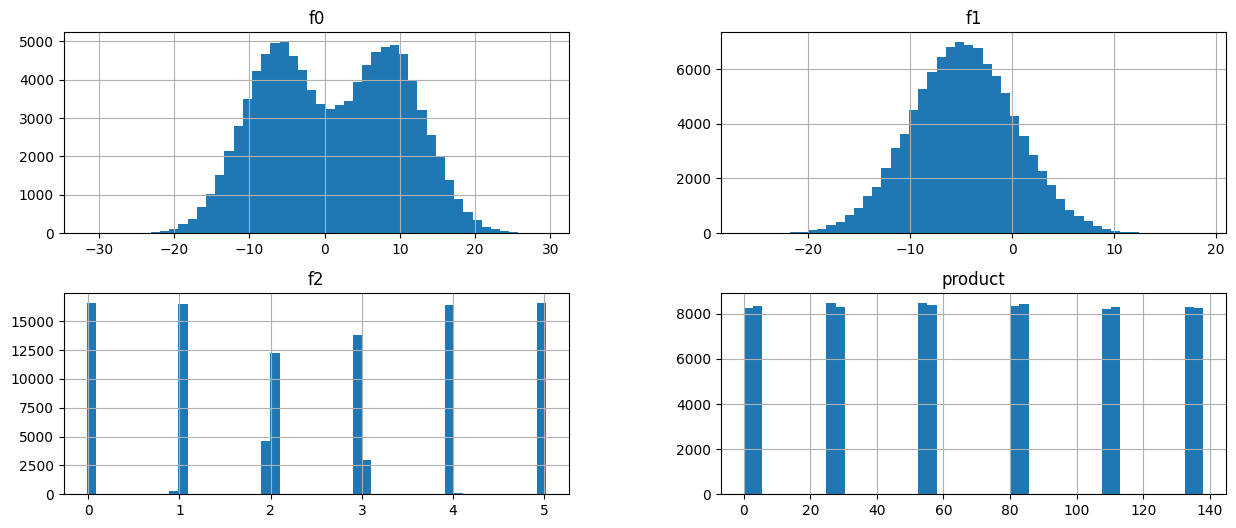

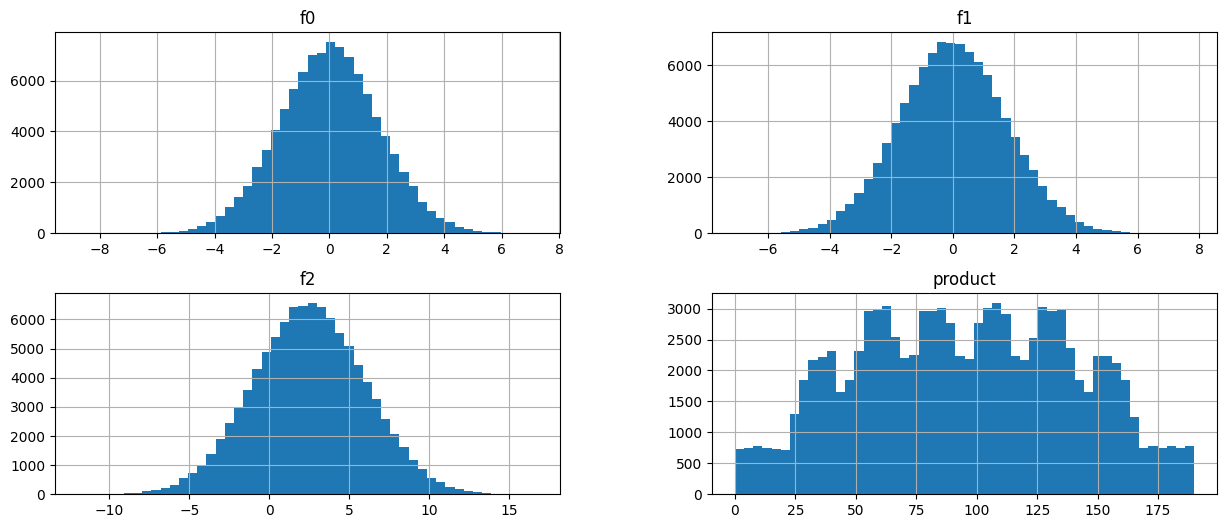

In [5]:
df_geo_0.hist(figsize=(15, 6), bins=50)
df_geo_1.hist(figsize=(15, 6), bins=50)
df_geo_2.hist(figsize=(15, 6), bins=50);

В целом выглядит достойно (если только формы распределений местами странноваты), вылетов нигде нет, но меня несколько настораживают гистограммы *f2* и *product* в *df_geo_1*, хорошо бы их проверить на колинеарность.

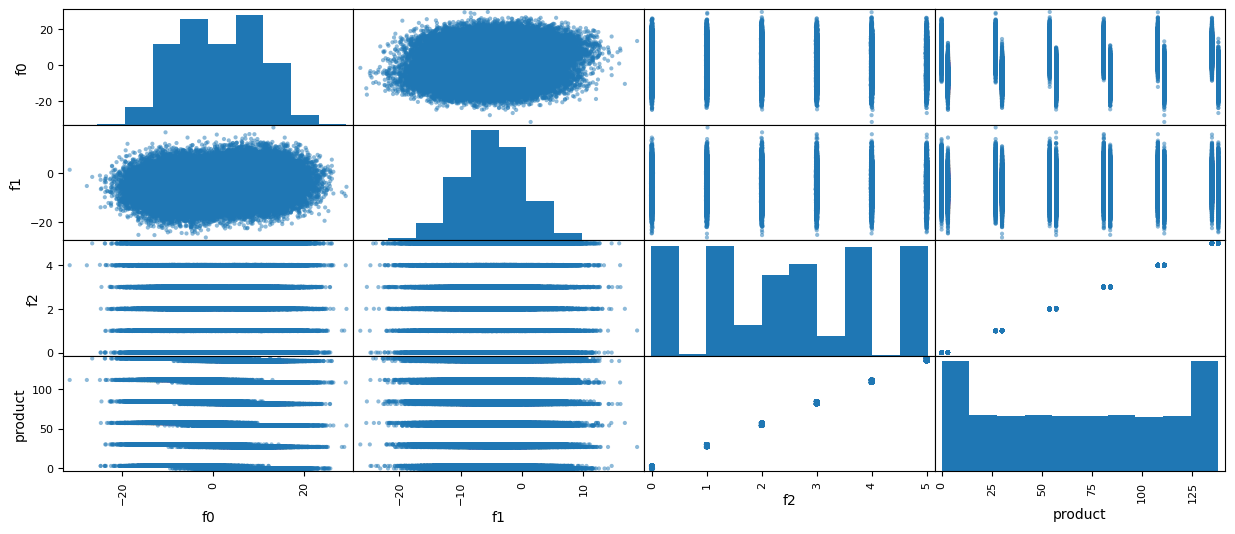

In [6]:
pd.plotting.scatter_matrix(df_geo_1, figsize=(15, 6));

Так оно и есть, выглядит, что *f2* практически полностью диктует значение *product*.

Пока не могу сказать, как это повлияет на результаты, но стоит это иметь в виду.

### Удаление дубликатов

На всякий случай проверим на наличие явных дубликатов.

In [7]:
shape_init_0 = df_geo_0.shape
shape_init_1 = df_geo_1.shape
shape_init_2 = df_geo_2.shape

df_geo_0.drop_duplicates(subset="id", inplace=True)
print("Датафрейм {0}, удалено дубликатов: {1}".format("df_geo_0", shape_init_0[0] - df_geo_0.shape[0]))

df_geo_1.drop_duplicates(subset="id", inplace=True)
print("Датафрейм {0}, удалено дубликатов: {1}".format("df_geo_1", shape_init_1[0] - df_geo_1.shape[0]))

df_geo_2.drop_duplicates(subset="id", inplace=True)
print("Датафрейм {0}, удалено дубликатов: {1}".format("df_geo_1", shape_init_2[0] - df_geo_2.shape[0]))

Датафрейм df_geo_0, удалено дубликатов: 10
Датафрейм df_geo_1, удалено дубликатов: 4
Датафрейм df_geo_1, удалено дубликатов: 4


На удивление несколько дубликатов нашлось.

Неявные дубликаты здесь искать бессмысленно, на этом этап работы с дубликатами окончен.

На этом изучение и обработка данных окончены, можно обучать модели.

## Обучение и проверка модели

Теперь можно данные делить и обучать модели.

Здесь еще есть вопрос в том, использовать скейлинг данных или нет.

Я думаю, в этом случае его использовать не стоит по следующим причинам:
* Как я понимаю, параметры *f0*, *f1* и *f2* отражают одни и те же физические величины, но при этом принимают разные диапазоны значений. Если их скейлить по отдельности, то эта разница исчезнет, т.е. например, скейленное значение 0.5 будет означать совершенно разные физические величины/количества (в нулевом дфе это будет, скажем, 5, а в первом - 4).
* По-хорошему, нужно скейлить еще и целевой признак. И тогда начнутся проблемы на этапе сравнения метрик: под значением 0.5 смогут скрываться как 50 тыс. баррелей, так и 60.

Поэтому попробуем сделать без скейлинга, посмотрим, что получится.

### Разделение данных

Сначала разделим признаки на целевые и фичи.

Целевым у нас выступает *product*, фичами *f0, f1, f2*.

*id* никак использоваться не будет, название скважины никак с природой залежи не связано.

In [8]:
seed = 111 ## Сид генератора случайных чисел для воспроизведения результатов

In [9]:
features_0 = df_geo_0.drop(["id", "product"], axis=1)
features_1 = df_geo_1.drop(["id", "product"], axis=1)
features_2 = df_geo_2.drop(["id", "product"], axis=1)

target_0 = df_geo_0["product"]
target_1 = df_geo_1["product"]
target_2 = df_geo_2["product"]

Теперь можно данные делить на обучающие и валидационные выборки.

Делить будем в пропорции 75/25 по условию задания.

In [10]:
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(features_0, target_0, 
                                                                                      train_size=.75, random_state=seed)

print(features_0_train.shape)
print(features_0_valid.shape)
print(target_0_train.shape)
print(target_0_valid.shape)

(74992, 3)
(24998, 3)
(74992,)
(24998,)


In [11]:
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, 
                                                                                      train_size=.75, random_state=seed)

print(features_1_train.shape)
print(features_1_valid.shape)
print(target_1_train.shape)
print(target_1_valid.shape)

(74997, 3)
(24999, 3)
(74997,)
(24999,)


In [12]:
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, 
                                                                                      train_size=.75, random_state=seed)

print(features_2_train.shape)
print(features_2_valid.shape)
print(target_2_train.shape)
print(target_2_valid.shape)

(74997, 3)
(24999, 3)
(74997,)
(24999,)


Данные разделены, можно обучать модели.

### Обучение моделей

По условию нам доступна только линейная регрессия, ее и будем обучать.

In [13]:
def train_model(features:pd.DataFrame, target:pd.DataFrame) -> LinearRegression():
    '''
    Trains a linear regression model
    Takes features and target data to train the model on
    Returns a trained model
    '''
    model = LinearRegression()
    model.fit(features, target)
    
    return model

In [14]:
model_0 = train_model(features_0_train, target_0_train)
model_1 = train_model(features_1_train, target_1_train)
model_2 = train_model(features_2_train, target_2_train)

### Проверка качества моделей

Модели обучены, можно делать предсказания и смотреть метрики.

In [15]:
predictions_0 = model_0.predict(features_0_valid)
predictions_1 = model_1.predict(features_1_valid)
predictions_2 = model_2.predict(features_2_valid)

In [16]:
def model_summary(predictions:pd.DataFrame, target_val:pd.DataFrame) -> tuple:
    '''
    Calculates mean predictions value and RMSE relative to the true values
    Takes: model predictions and true values
    Returns: tuple with the following indexes
        0 - predictions mean
        1 - RMSE
    '''
    mean_prediction = predictions.mean()
    score = (mean_squared_error(target_val, predictions)) ** 0.5
    
    return mean_prediction, score

In [17]:
print(
'''
Регион 0
Среднее предсказанное значение запасов: {0:.1f}
RMSE модели: {1:.2f}
'''.format(*model_summary(predictions_0, target_0_valid))
)

print(
'''
Регион 1
Среднее предсказанное значение запасов: {0:.1f}
RMSE модели: {1:.2f}
'''.format(*model_summary(predictions_1, target_1_valid))
)

print(
'''
Регион 2
Среднее предсказанное значение запасов: {0:.1f}
RMSE модели: {1:.2f}
'''.format(*model_summary(predictions_2, target_2_valid))
)


Регион 0
Среднее предсказанное значение запасов: 92.4
RMSE модели: 37.81


Регион 1
Среднее предсказанное значение запасов: 68.6
RMSE модели: 0.89


Регион 2
Среднее предсказанное значение запасов: 94.9
RMSE модели: 40.03



### Выводы

* Регионы 0 и 2 имеют сравнимые значения средних запасов (\~93 тыс. барр) и вместе с тем сравнимые (высокие) показатели RMSE (\~39).
* Регион 1 имеет существенно более низкие значения запасов, но в то же время эти значения существенно более уверенные, т.к. RMSE близок к нулю. Что ожидаемо, учитывая, что, как мы видели, значение целевого параметра для этого региона почти полностью диктуется параметром *f2*.

## Подготовка к расчёту прибыли

### Расчет порогового значения запасов

По заданию все необходимые данные для расчета нужно вывести в переменные, что и сделаем.

In [18]:
mean_product_0 = model_summary(predictions_0, target_0_valid)[0]
mean_product_1 = model_summary(predictions_1, target_1_valid)[0]
mean_product_2 = model_summary(predictions_2, target_2_valid)[0]

CAPEX = 10e9   ## СAPital EXpenses - цена реализации проекта, затраты
PRICE = 450e3  ## Удельная стоимость единицы запасов
WELL_NUM = 200 ## Число скважин, которые будут пробурены в регионе

Теперь можно считать пороговое значение окупаемости для скважины.

Формула расчета прибыли в общем виде выглядит так:

$$
Прибыль = запасы\: на\: скважину * цена\: единицы\: запасов * число\: скважин - затраты
$$

Нас интересует пороговое значение запасов на скважину, когда $Прибыль = 0$.

Тогда формула приобретает следующий вид:
$$
Запасы\: на\: скважину = \frac{затраты}{цена\: единицы\: запасов * число\: скважин}
$$

Осталось только подставить значения в формулу.

In [19]:
threshold_product = CAPEX / (PRICE * WELL_NUM)
print("Пороговое значение запасов на скважину: {0:.1f} тыс. баррелей".format(threshold_product))

Пороговое значение запасов на скважину: 111.1 тыс. баррелей


### Выводы

Ни один из регионов не имеет среднего значения запасов на скважину выше порогового.

Однако, это значение получено для 25000 скважин, а нас интересуют только 200 первых из 500 случайных, так что, вполне возможно, что некоторые (или даже все) регионы окажутся прибыльными.

### Функция для расчета прибыли на скважину

Дальше нам понадобится функция для расчета прибыли с 200 первых скважин по запасам.

In [27]:
def region_profit(predictions, truths, price:float, capex:float, well_num:int) -> float:
    '''
    Calculates the sum of expected profit for top n well in a region
    Takes:
        predictions - predicted reserves for all the wells, intended units - Mbbl
        price - price per unit of reserves, intended units - th. rub
        capex - capital expenses required in order to produce from the region, intended units - rub
        well_num - number of wells to be drilled in order to produce from the region, intended units - pcs
    Returns:
        Total profit for the region, intended units - rub
    '''
    
    df = pd.DataFrame({"predictions":predictions, "truths":truths})
    df = df.sort_values(by="predictions", ascending=False)[:well_num]
    
    ## Суммарная выручка со всех скважин
    profit = df["truths"].apply(lambda reserves: reserves * price).sum()
    
    return profit - capex

Функция готова, теперь хорошо бы убедиться, что она работает так, ожидается, чтобы потом не искать причины ошибок.

In [29]:
class ProfitTest(unittest.TestCase):
    
    def test_threshold(self):
        threshold = 10e9 / (450e3 * 200)
        series = pd.Series(threshold, index=range(500))
        self.assertEqual(region_profit(series, series, price=450e3, capex=10e9, well_num=200),
                         0,
                         "incorrect threshold"
                        )
    
    def test_uniform(self):
        predictions = pd.Series(100, index=range(1000))
        truths = pd.Series(120, index=range(1000))
        self.assertEqual(region_profit(predictions, truths, price=450e3, capex=10e9, well_num=200),
                         120 * 200 * 450e3 - 10e9,
                         "uniform test failed"
                        )
        
    def test_mixed_simple(self):
        predictions1 = pd.Series(200, index=range(100))
        predictions2 = pd.Series(100, index=range(400))
        truths1 = pd.Series(200, index=range(100))
        truths2 = pd.Series(100, index=range(400))
        predictions, truths = shuffle(pd.concat([predictions1, predictions2]), pd.concat([truths1, truths2]))
        self.assertEqual(region_profit(predictions, truths, price=450e3, capex=10e9, well_num=200),
                         (100 * 200 + 100 * 100) * 450e3 - 10e9,
                         "simple mixed test failed"
                        )
        
    def test_mixed_complex(self):
        predictions1 = pd.Series(200, index=range(50))
        predictions2 = pd.Series(150, index=range(50))
        predictions3 = pd.Series(100, index=range(400))
        truths1 = pd.Series(100, index=range(50))
        truths2 = pd.Series(120, index=range(50))
        truths3 = pd.Series(150, index=range(400))
        predictions, truths = shuffle(pd.concat([predictions1, predictions2, predictions3]), pd.concat([truths1, truths2, truths3]))
        self.assertEqual(region_profit(predictions, truths, price=450e3, capex=10e9, well_num=200),
                         (50 * 100 + 50 * 120 + 100 * 150) * 450e3 - 10e9,
                         "complex mixed test failed"
                        )
        
unittest.main(argv=['ignored_arg'], exit=False);

....
----------------------------------------------------------------------
Ran 4 tests in 0.018s

OK


Вроде все работает как задумано, можно продолжать.

## Расчёт прибыли и рисков 

Теперь для каждого из регионов техникой bootstrap посчитаем среднюю прибыльность, 95% доверительный интервал и вероятность убытков.

Т.к. по условию задания выбирается 500 точек, из которых добыча осуществляется из 200 с наибольшими запасами, внутри итерации будем случайно сэмплить 500 точек, к ним применять функцию расчета прибыли из 200 лучших.

Делать будем по 1000 итераций бутстрапа по условию задания. В результате получится распределение прибыли, из этого распределения посчитаем интересующие нас метрики.

Поскольку этот анализ нам нужно будет проводить несколько раз, есть смысл написать функцию:

In [31]:
def bootstrap_summary(predictions, truths, iterations:int, seed:int, sample_size:int, confidence_width:float, **kwargs) -> dict:
    '''
    
    '''
    summary = {}
    random = np.random.RandomState(seed)
    profits = []
    
    data = pd.DataFrame({"predictions":predictions, "truths":truths})

    for i in range(iterations):
        
        subsample = data.sample(n=sample_size, random_state=random, replace=True)
        profits.append(region_profit(predictions=subsample["predictions"],
                                     truths=subsample["truths"],
                                     price=kwargs["price"],
                                     capex=kwargs["capex"],
                                     well_num=kwargs["well_num"]
                                    )
                      )
        
    profits = pd.Series(profits)

    summary["mean_profit"] = profits.mean()
    summary["confidence_interval"] = (profits.quantile((1 - confidence_width) / 2),
                                      profits.quantile(confidence_width + (1 - confidence_width) / 2)
                                     )
    summary["profitability_prob"] = profits[profits > 0].count() / profits.count()
    
    cdf_x = np.sort(profits)
    cdf_y = np.arange(0, 1, 1 / iterations)
    summary["cdf"] = cdf_x, cdf_y
    
    return summary

Удобно будет построить по результатам бутстрапа CDF кривую и на ней отметить среднее и границы доверительного интервала. Напишем для этого функцию.

In [32]:
def plot_cdf(summary):
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))

    ax.plot(summary["cdf"][0], summary["cdf"][1], color="black", label="CDF")
    
    plt.grid(color="#D8D8D8")
    
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    #ax.set_xticks(np.arange(-1e9, 1e9, 100e6))
    
    ax.set_ylabel("Накопленная вероятность")
    ax.set_xlabel("Прибыль проекта")
    
    ax.axvline(summary["mean_profit"], color="orange", label="Средняя прибыль")
    ax.axvline(summary["confidence_interval"][0], color="red", label="Нижняя граница 95% доверительного интервала")
    ax.axvline(summary["confidence_interval"][1], color="green", label="Верхняя граница 95% доверительного интервала")
    ax.axhline(1 - summary["profitability_prob"], color="black", linestyle=":", label="Риск убыточности")
    
    ax.legend(loc="upper left") 
    
    return ax

### Bootstrap: регион 0

Функции написаны, можно их вызывать. Начнем по порядку, с нулевого региона.

In [34]:
summary_0 = bootstrap_summary(predictions_0, target_0_valid, iterations=1000, seed=seed, sample_size=500, confidence_width=.95,
                              price=PRICE, capex=CAPEX, well_num=WELL_NUM)


Регион 0
Средняя прибыль: 402,316,659 руб
95% доверительный интервал: -115,275,777 - 929,456,087 руб
Риск убыточности: 5.50%



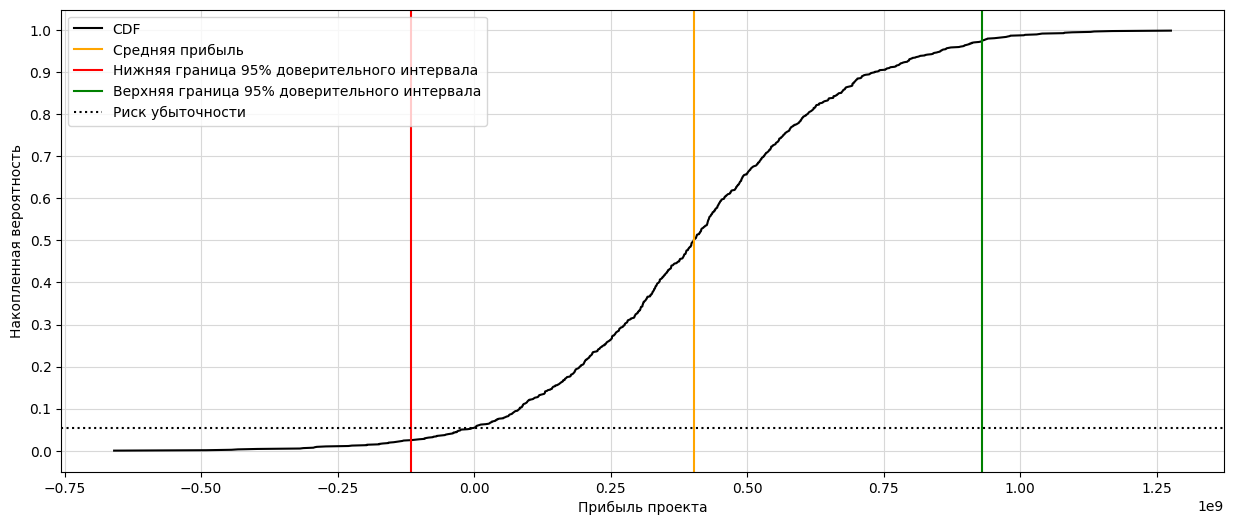

In [35]:
print(
'''
Регион 0
Средняя прибыль: {0:,.0f} руб
95% доверительный интервал: {1:,.0f} - {2:,.0f} руб
Риск убыточности: {3:.2%}
'''.format(
    summary_0["mean_profit"], summary_0["confidence_interval"][0], summary_0["confidence_interval"][1], 1 - summary_0["profitability_prob"]
)
)
plot_cdf(summary_0);

Регион рискованный ($P(Убыточность)=5.5\%$) и не проходит по этому критерию по условию задания (< 2.5%)

Предполагаю, что вызвано это весьма низким качеством предсказания модели: RMSE ~38 при $\overline{x}$ ~90.

Интересно посмотреть на следующий регион, там качество предсказания модели было сильно выше.

### Bootstrap: регион 1

In [37]:
summary_1 = bootstrap_summary(predictions_1, target_1_valid, iterations=1000, seed=seed, sample_size=500, confidence_width=.95,
                              price=PRICE, capex=CAPEX, well_num=WELL_NUM)


Регион 1
Средняя прибыль: 413,493,391 руб
95% доверительный интервал: 15,213,429 - 828,795,022 руб
Риск убыточности: 2.00%



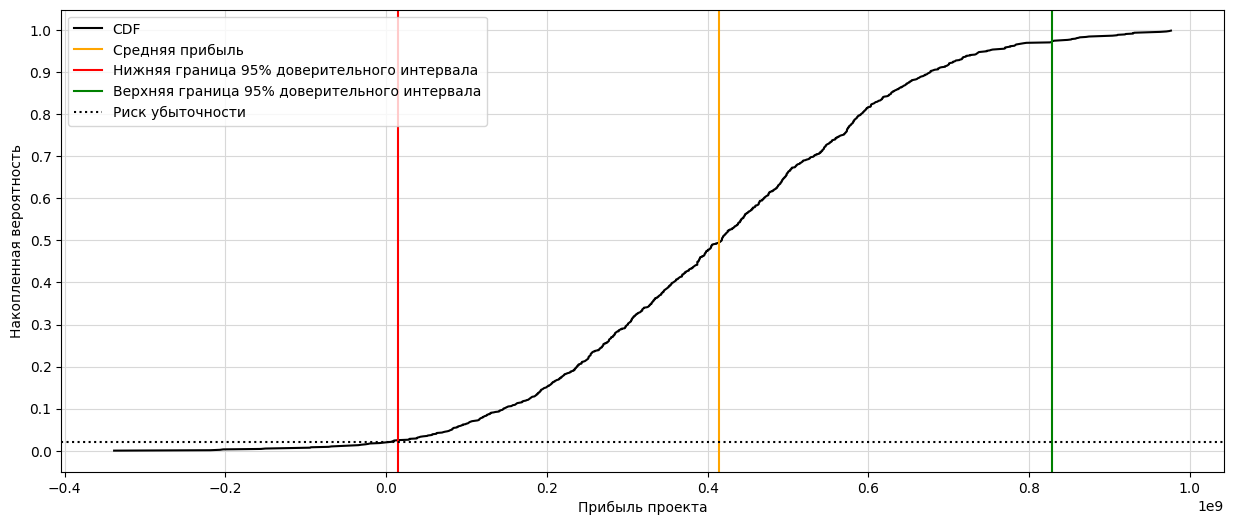

In [38]:
print(
'''
Регион 1
Средняя прибыль: {0:,.0f} руб
95% доверительный интервал: {1:,.0f} - {2:,.0f} руб
Риск убыточности: {3:.2%}
'''.format(
    summary_1["mean_profit"], summary_1["confidence_interval"][0], summary_1["confidence_interval"][1], 1 - summary_1["profitability_prob"]
)
)
reg_1_cdf = plot_cdf(summary_1);

Так и есть, регион гораздо менее рискованный и проходит по условию задачи, что, как я думаю, вызывано качеством предсказания модели. Напомню, что в этом регионе целевой признак практически полностью диктуется параметром *f2*.

Осталось посмотреть последний регион, ожидаю там увидеть картину сходную с нулевым.

### Bootstrap: регион 2

In [39]:
summary_2 = bootstrap_summary(predictions_2, target_2_valid, iterations=1000, seed=seed, sample_size=500, confidence_width=.95,
                              price=PRICE, capex=CAPEX, well_num=WELL_NUM)


Регион 2
Средняя прибыль: 377,963,382 руб
95% доверительный интервал: -147,654,906 - 885,842,840 руб
Риск убыточности: 6.60%



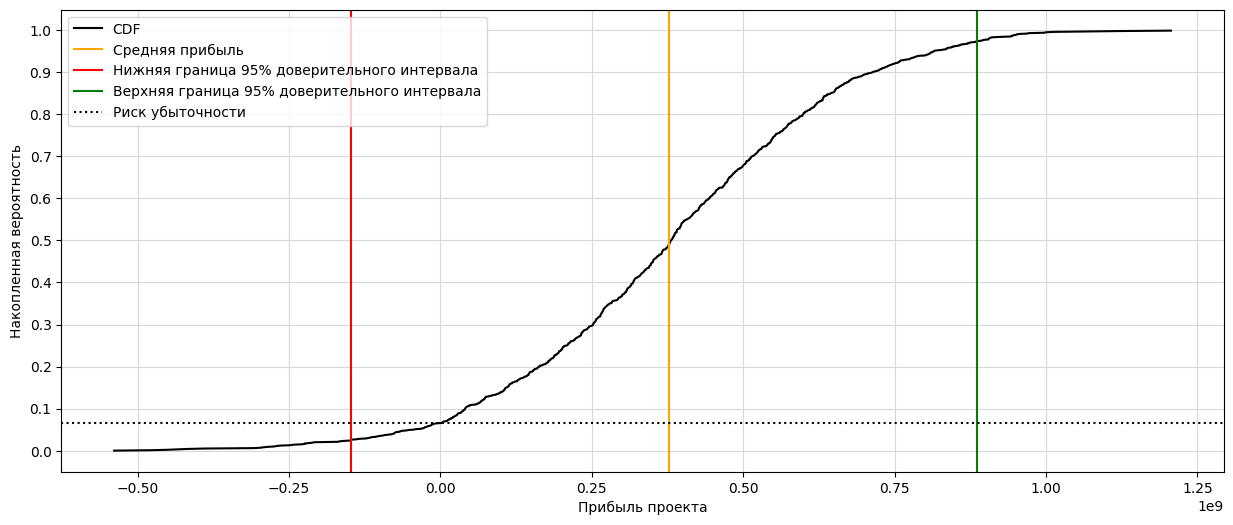

In [40]:
print(
'''
Регион 2
Средняя прибыль: {0:,.0f} руб
95% доверительный интервал: {1:,.0f} - {2:,.0f} руб
Риск убыточности: {3:.2%}
'''.format(
    summary_2["mean_profit"], summary_2["confidence_interval"][0], summary_2["confidence_interval"][1], 1 - summary_2["profitability_prob"]
)
)
reg_2_cdf = plot_cdf(summary_2);

Картина сходная с нулевым регионом: тоже низкое качество предсказаний модели и, соответственно, высокий риск убыточности, который тоже не проходит по условию задания.

### Bootstrap: оформление результатов

Поместим CDF всех регионов на общую ось прибыли для наглядности сравнения.

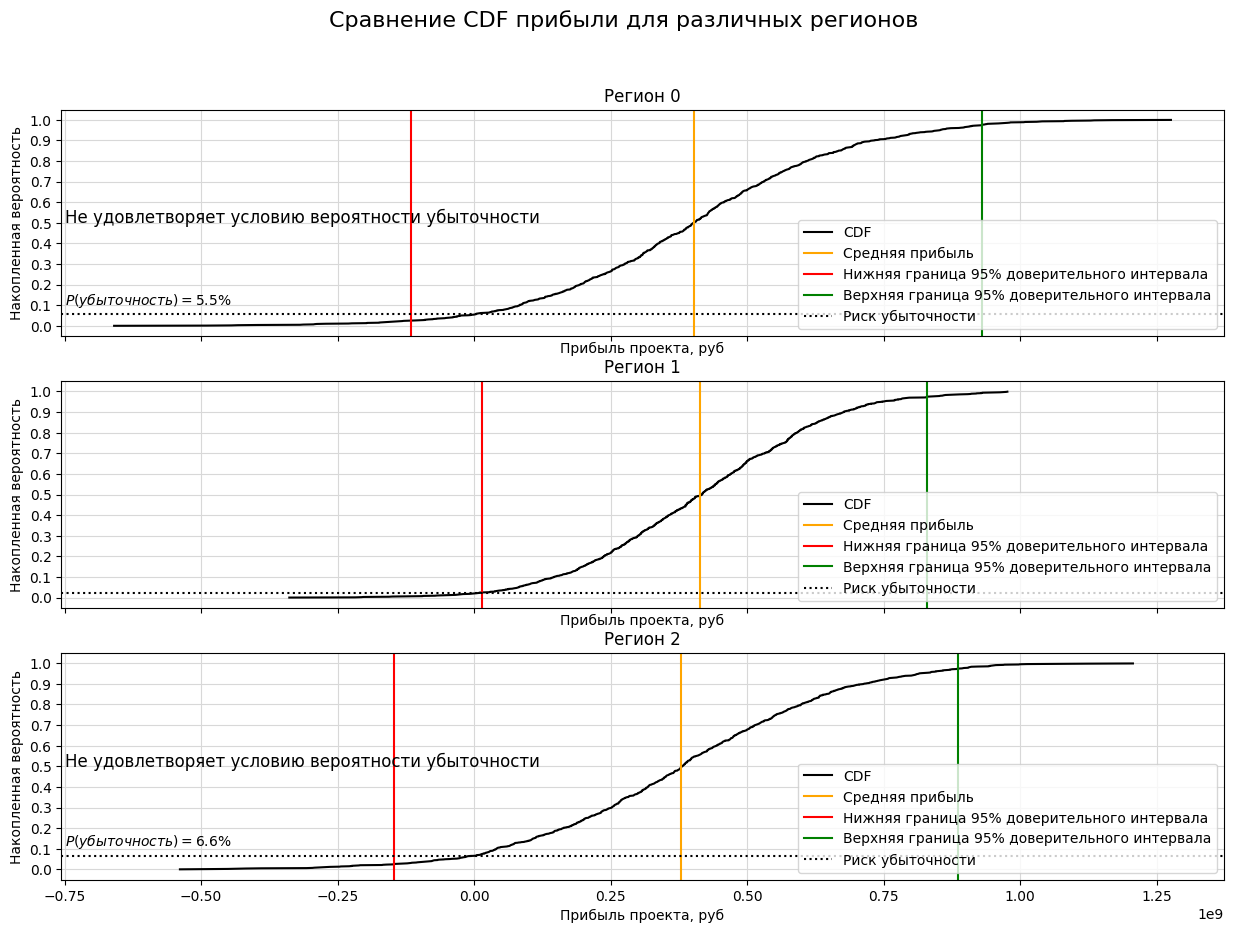

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
## Почему-то через kwarg subplot подымает ошибку, пришлось вписать так
fig.layout="constrained"
fig.suptitle("Сравнение CDF прибыли для различных регионов", fontsize=16)


axi = 0
axtitles = ["Регион 0", "Регион 1", "Регион 2"]

for summary in [summary_0, summary_1, summary_2]:

    ax[axi].plot(summary["cdf"][0], summary["cdf"][1], color="black", label="CDF")
    
    ax[axi].set_title(axtitles[axi])

    ax[axi].grid(color="#D8D8D8")

    ax[axi].set_yticks(np.arange(0, 1.1, 0.1))
    #ax.set_xticks(np.arange(-1e9, 1e9, 100e6))

    ax[axi].set_ylabel("Накопленная вероятность")
    ax[axi].set_xlabel("Прибыль проекта, руб")

    ax[axi].axvline(summary["mean_profit"], color="orange", label="Средняя прибыль")
    ax[axi].axvline(summary["confidence_interval"][0], color="red", label="Нижняя граница 95% доверительного интервала")
    ax[axi].axvline(summary["confidence_interval"][1], color="green", label="Верхняя граница 95% доверительного интервала")
    ax[axi].axhline(1 - summary["profitability_prob"], color="black", linestyle=":", label="Риск убыточности")

    ax[axi].legend(loc="lower right") 
    
    
    axi += 1
    
ax[0].text(-.75e9, .5, "Не удовлетворяет условию вероятности убыточности", fontsize="large")
ax[0].text(-.75e9, 1 - summary_0["profitability_prob"] + 0.05, "$P(убыточность)={0:.1f}\%$".format((1 - summary_0["profitability_prob"]) * 100))

ax[2].text(-.75e9, .5, "Не удовлетворяет условию вероятности убыточности", fontsize="large")
ax[2].text(-.75e9, 1 - summary_2["profitability_prob"] + 0.05, "$P(убыточность)={0:.1f}\%$".format((1 - summary_2["profitability_prob"]) * 100));

### Bootstrap: выводы

* Регионы 0 и 2 не проходят по условию рисков, вероятность убыточности в них 5.5% и 6.6% соответственно, что выше 2.5% по условию задания. Средняя прибыль для них составляет 402.3 и 388.0 млн. руб соответственно.
* Регион 1 проходит по условию рисков ($P(Убыточность)=2.0\%$) и имеет наибольшую среднюю прибыль (413.5 млн. руб)
* **Для разработки рекомендуется регион 1**, т.к. он единственный удовлетворяет условию рисков и имеет максимальную среднюю прибыль.

## Выводы

* Анализ проводился для трех потенциальных регионов для разработки: регион 0, регион 1 и регион 2.
* Данные для каждого региона были разделены на обучающую и валидационную выборки в пропорции 75%/25%.
* Для каждого региона была обучена модель линейной регрессии и получены предсказания, результаты проверки на валидационной выборке представлены ниже:
    - Регион 0
        - Среднее предсказанное значение запасов: 92.4
        - RMSE модели: 37.81
    - Регион 1
        - Среднее предсказанное значение запасов: 68.6
        - RMSE модели: 0.89
    - Регион 2
        - Среднее предсказанное значение запасов: 94.9
        - RMSE модели: 40.03
* Для каждого региона техникой bootstrap было получено распределение возможной прибыли на основании предсказаний моделей. Посчитано по 1000 итераций, в каждой итерации случайно выбирались 500 скважин, из которых для 200 с наибольшими запасами рассчитывалась прибыль. Результаты представлены на графике ниже:
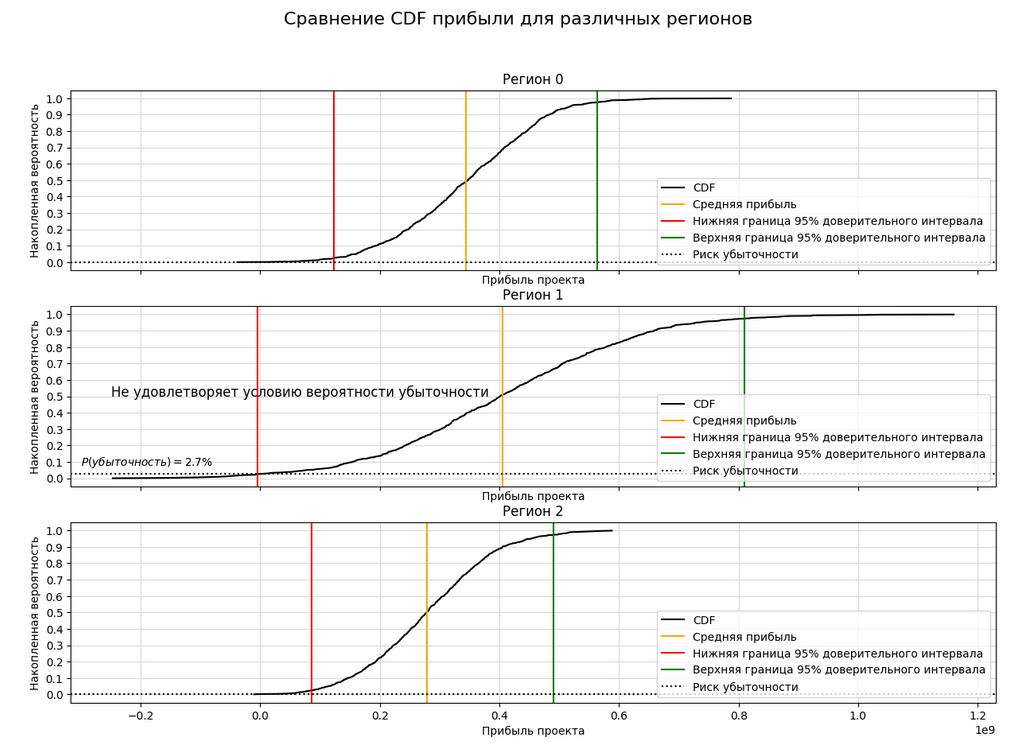
* Регион 1 имеет вероятность убыточности (2.7%) выше порогового значения по условию задания (2.5%)
* **Регион 0** имеет наибольший показатель средней прибыли (344.3 млн. руб) при условии выполнения прочих условий задания и потому **рекомендуется к разработке**.